In [1]:
from time import sleep
from IPython.display import Image, display
import QDevil_QDAC2 as QDAC2
qdac_addr = '192.168.8.15'
qdac = QDAC2.QDac2('QDAC-II', visalib='@py', address=f'TCPIP::{qdac_addr}::5025::SOCKET')
import qcodes.instrument_drivers.rigol.DS1074Z as DS1000Z
rigol_addr = '192.168.8.199'
scope = DS1000Z.DS1074Z('rigol', visalib='@py', address=f'TCPIP::{rigol_addr}::INSTR')

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jps/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jps/.qcodes/logs/210901-16389-qcodes.log
Connected to: QDevil QDAC-II (serial:0, firmware:3-0.9.10) in 0.37s
Connected to: RIGOL TECHNOLOGIES DS1104Z (serial:DS1ZA171812151, firmware:00.04.03) in 0.02s


In [2]:
qdac.reset()
scope.write('*rst')
sleep(3)

In [3]:
def capture():
    scope.write('stop')
    scope.write(":disp:data?")
    bmpdata = scope.visa_handle.read_raw()[2+9:]
    image = Image(data=bmpdata)
    display(image)

In [4]:
scope.write('chan1:disp off')
scope.write('chan3:disp on')
scope.write('chan3:bwl on')
scope.write('chan3:prob 1')
scope.write('chan3:scal 0.2')
scope.write('chan3:offs 0.0')
scope.write('trig:edge:sour chan3')
scope.write('trig:edge:level 0.25')
scope.write('tim:scal 5e-6')
scope.write('tim:offs 4e-6')

In [5]:
dc_list = qdac.ch03.dc_list(
    repetitions=2,
    voltages=[-0.1, 0.1, -0.2, 0.2, -0.4, 0.4],
    dwell_s=2e-6
)
dc_list.points()

6

In [6]:
scope.write('sing')
sleep(3)
dc_list.start()
qdac.errors()

'0, "No error"'

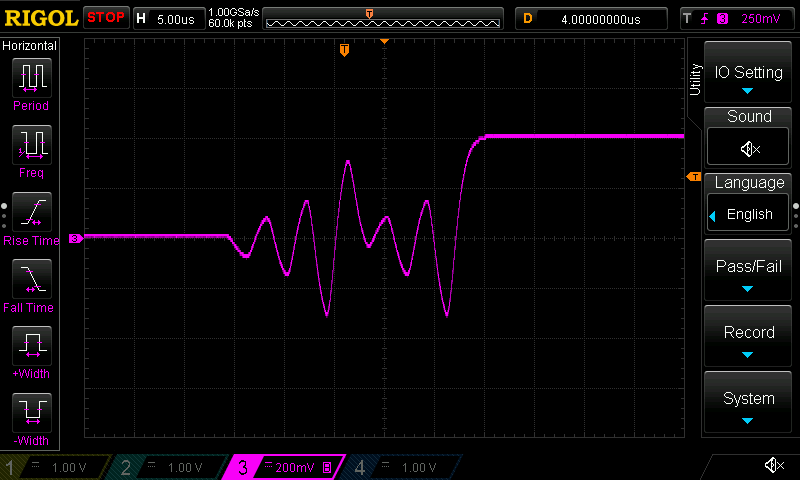

In [7]:
capture()

In [8]:
dc_list.append((-0.8, 0.8, 0))
dc_list.points()

9

In [9]:
scope.write('sing')
sleep(3)
dc_list.start()

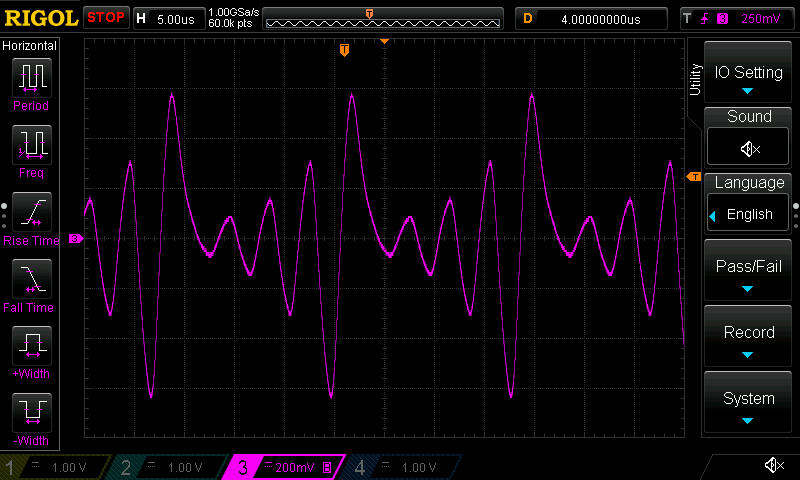

In [10]:
capture()

In [11]:
dc_list = qdac.ch03.dc_list(
    repetitions=-1,
    voltages=[-0.1, 0.1, -0.2, 0.2, -0.4, 0.4],
    dwell_s=2e-6
)

In [12]:
scope.write('chan3:scal 0.1')
scope.write('run')
dc_list.start()

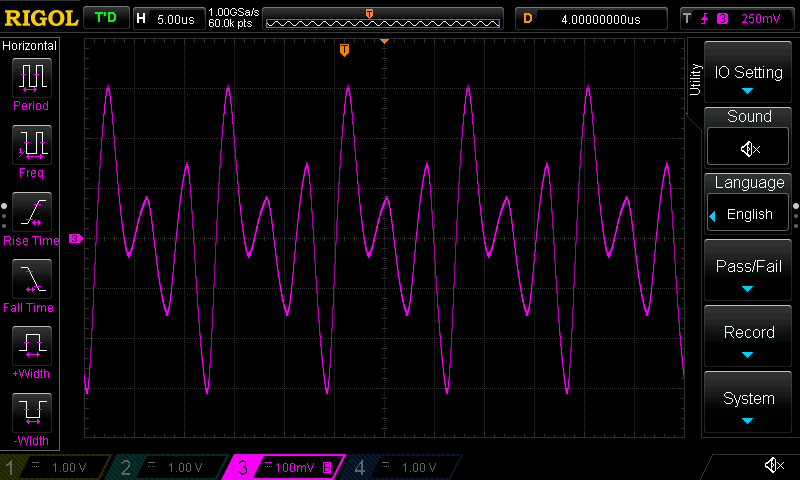

In [13]:
capture()

In [14]:
trigger = dc_list.step_start_marker()
qdac.ext4.width_s(1e-6)
qdac.ext4.polarity('norm')
qdac.ext4.source_from_trigger(trigger)
scope.write('chan4:disp on')
scope.write('chan4:bwl on')
scope.write('chan4:prob 1')
scope.write('chan4:scal 1')
scope.write('chan4:offs -2')
scope.write('tim:scal 2e-6')
qdac.errors()

'0, "No error"'

In [15]:
scope.write('run')
dc_list.start()

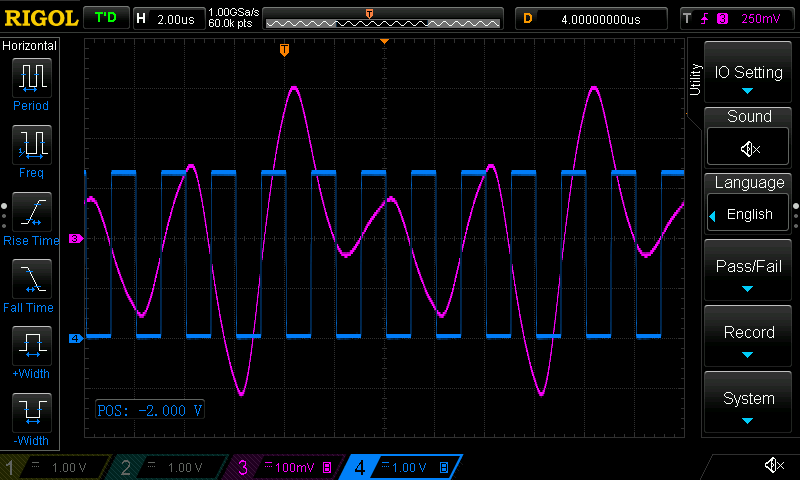

In [16]:
capture()

In [17]:
trigger = dc_list.step_end_marker()
qdac.ext1.width_s(1e-6)
qdac.ext1.polarity('norm')
qdac.ext1.source_from_trigger(trigger)
scope.write('chan1:disp on')
scope.write('chan1:bwl on')
scope.write('chan1:prob 1')
scope.write('chan1:scal 1')
scope.write('chan1:offs -2')
qdac.errors()

'0, "No error"'

In [18]:
scope.write('run')
dc_list.start()

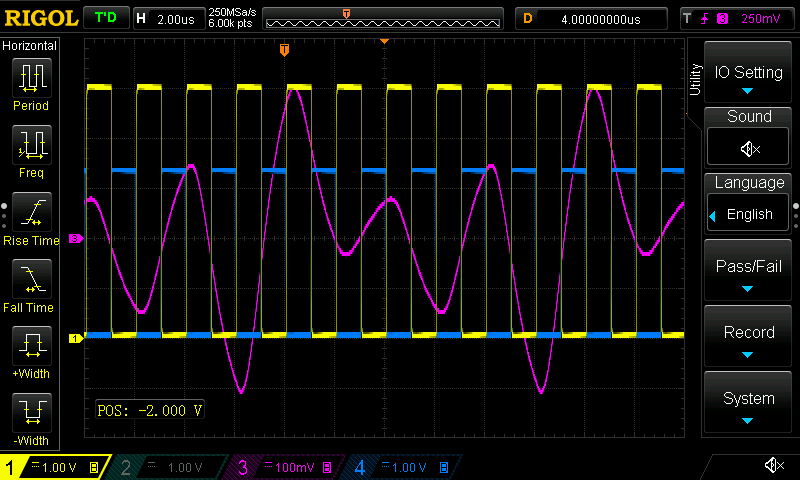

In [19]:
capture()

In [20]:
scope.write('run')
sleep(1)
dc_list.abort()

In [21]:
with qdac.ch03.dc_list(
    repetitions=2,
    voltages=[-0.1, 0.1, -0.2, 0.2, -0.4, 0.4],
    dwell_s=1e-6
) as my_list:
    print(my_list.points())

6
